# Trial run with NN and no sentiment analysis 

Referenced: # https://colab.research.google.com/drive/1tUr5t0ZJ-I4Ni40dkbjku92HAU5SyR_2?usp=sharing#scrollTo=VJAhUNVOG7Xl


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.utils import shuffle
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd

In [6]:
df = pd.read_csv('daily.csv')

In [21]:
df,df_test = train_test_split(df,test_size=0.2,shuffle=False,random_state=42)

In [22]:
df.head()

,date,text,price,change_percent,change_type
0,2016-09-07,Ruling Tips Uber Drivers Away From Class-Actio...,2186.16,-0.014635,down
1,2016-09-08,Clinton-Trump Presidential Forum Draws 15 Mill...,2181.30,-0.222308,down
2,2016-09-09,Galaxy Note 7 Owners Are Urged to Stop Using T...,2127.81,-2.452207,down
3,2016-09-10,No Driver? Bring It On. How Pittsburgh Became ...,2127.81,0.000000,same
4,2016-09-11,"After 11 Years, Case of A.I.G.’s Ex-Chief Is G...",2127.81,0.000000,same


In [23]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [24]:
def vectorize(df):
    embeded_tweets = embed(df['text'].values.tolist()).numpy()
    targets = df.change_percent.values
    return embeded_tweets,targets

embeded_tweets,targets = vectorize(df)

In [25]:
embeded_tweets.shape

(1431, 512)

In [26]:
model = Sequential()
model.add(Input(shape=(512,),dtype='float32'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss='mse', 
              optimizer='adam',
              metrics=['acc'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 73,985
Trainable params: 73,985
Non-trainable params: 0
_________________________________________________________________


In [28]:
2**8

256

In [29]:
num_epochs = 100
batch_size = 256   ## 2^x

history = model.fit(embeded_tweets, 
                    targets, 
                    epochs=num_epochs, 
                    validation_split=0.1, 
                    shuffle=False,
                    batch_size=batch_size)

Epoch 1/100
6/6 [==============================] - 0s 18ms/step - loss: 1.0059 - acc: 0.3061 - val_loss: 2.0853 - val_acc: 0.3056
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0003 - acc: 0.3061 - val_loss: 2.0752 - val_acc: 0.3056
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0007 - acc: 0.3061 - val_loss: 2.0629 - val_acc: 0.3056
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0048 - acc: 0.3061 - val_loss: 2.0551 - val_acc: 0.3056
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0031 - acc: 0.3061 - val_loss: 2.0556 - val_acc: 0.3056
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9998 - acc: 0.3061 - val_loss: 2.0616 - val_acc: 0.3056
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9976 - acc: 0.3061 - val_loss: 2.0686 - val_acc: 0.3056
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9972 - acc: 0.3054 - va

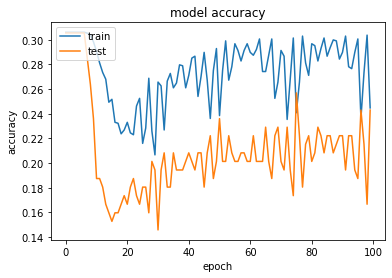

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [31]:
df

,date,text,price,change_percent,change_type
0,2016-09-07,Ruling Tips Uber Drivers Away From Class-Actio...,2186.16,-0.014635,down
1,2016-09-08,Clinton-Trump Presidential Forum Draws 15 Mill...,2181.30,-0.222308,down
2,2016-09-09,Galaxy Note 7 Owners Are Urged to Stop Using T...,2127.81,-2.452207,down
3,2016-09-10,No Driver? Bring It On. How Pittsburgh Became ...,2127.81,0.000000,same
4,2016-09-11,"After 11 Years, Case of A.I.G.’s Ex-Chief Is G...",2127.81,0.000000,same
...,...,...,...,...,...
1426,2020-08-14,Pinterest Employees Demand Gender and Race Equ...,3372.85,-0.017193,down
1427,2020-08-15,Trump Officially Orders TikTok’s Chinese Owner...,3372.85,0.000000,same
1428,2020-08-16,Rolling Blackouts in California Have Power Exp...,3372.85,0.000000,same
1429,2020-08-17,California Expresses Frustration as Blackouts ...,3381.99,0.270987,up


In [33]:
from sklearn.metrics import accuracy_score

In [37]:
df_test['text']

1431    Big-Box Retailers’ Profits Surge as Pandemic M...
1432    Unemployment Claims Rise as Rollout of $300 Be...
1433    National Enquirer Chief David Pecker Loses Top...
1434    TikTok to Challenge Trump Administration Over ...
1435    Twitter Flags Trump Tweet for Dissuading Votin...
                              ...                        
1784    Snopes Retracts 60 Articles Plagiarized by Co-...
1785    The Limits of Vacation. During the pandemic, s...
1786    You’ve Never Heard of the Biggest Digital Medi...
1787    Janet Yellen Gets a Chance to Shape the Fed, T...
1788    The owner of Politico is said to be seeking $1...
Name: text, Length: 358, dtype: object

In [39]:
df_test.columns

Index(['date', 'text', 'price', 'change_percent', 'change_type'], dtype='object')

In [40]:
#embed_test,targets = vectorize(df_test['text'])
#predictions = model.predict(embed_test).astype(int)
#accuracy_score(predictions,targets)*100

# Count Vectorizer/TFIDF + Multinomial Naive Bayes

In [71]:
# imports 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# transformer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer

# model pipeline 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
# models 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

#distributions for searching different hyperparamters
from scipy.stats import uniform, loguniform,randint

# model metrics
import sklearn.metrics

In [55]:
# helper function to visualize impact of different values for hyperparamters 
def graph_cv_results(model,param):
    'returns graph of different param values tried by search against F1 score'
    model_results = pd.DataFrame(model.cv_results_)
    x=model_results[f"param_{param}"]
    y=model_results['mean_test_f1_weighted']
    sns.scatterplot(x=x,y=y)
  #ymax = max(y)
  #xpos = y.index(ymax)
    return #f"Max Value of mean_test_f1_weighted occurs at {max(x)} "

In [49]:
df = pd.read_csv('daily.csv')

In [57]:
df.head()

,date,text,price,change_percent,change_type
0,2016-09-07,Ruling Tips Uber Drivers Away From Class-Actio...,2186.16,-0.014635,down
1,2016-09-08,Clinton-Trump Presidential Forum Draws 15 Mill...,2181.30,-0.222308,down
2,2016-09-09,Galaxy Note 7 Owners Are Urged to Stop Using T...,2127.81,-2.452207,down
3,2016-09-10,No Driver? Bring It On. How Pittsburgh Became ...,2127.81,0.000000,same
4,2016-09-11,"After 11 Years, Case of A.I.G.’s Ex-Chief Is G...",2127.81,0.000000,same


In [59]:
# define X and y 
X= df['text'] 
y=df['change_type']

# Define training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    shuffle=False,
                                                    random_state=42)

In [60]:
# Default hyperparamters 

#instantiate pipeline 
cvec_pipe= Pipeline([
                     ('cvec',CountVectorizer()),
                     ('nb',MultinomialNB())
])
# fit pipeline with default hyperparamters  
cvec_pipe.fit(X_train,y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('nb', MultinomialNB())])

In [62]:
cvec_pipe.score(X_train,y_train),cvec_pipe.score(X_test,y_test)

(0.934762348555452, 0.3687150837988827)

In [67]:
# add tfidf  

#instantiate pipeline 
tvec_pipe= Pipeline([
                     #('cvec',CountVectorizer()),
                     ('tvec', TfidfVectorizer()),
                     ('nb',MultinomialNB())
])
# fit pipeline with default hyperparamters  
tvec_pipe.fit(X_train,y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('nb', MultinomialNB())])

In [68]:
tvec_pipe.score(X_train,y_train),tvec_pipe.score(X_test,y_test)

(0.3811742777260019, 0.4134078212290503)

In [72]:
#cvec and ttrans
tvec_pipe1= Pipeline([
                     ('cvec',CountVectorizer()),
                     ('ttrans', TfidfTransformer()),
                     ('nb',MultinomialNB())
])
# fit pipeline with default hyperparamters  
tvec_pipe1.fit(X_train,y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('tvec', TfidfTransformer()),
                ('nb', MultinomialNB())])

In [73]:
tvec_pipe1.score(X_train,y_train),tvec_pipe1.score(X_test,y_test)

(0.3811742777260019, 0.4134078212290503)

# Word2Vec

In [74]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
# WARNING THIS DOWNLOADS ABOUT 2 GB of data 
import gensim.downloader as api
w2v = api.load('word2vec-google-news-300')

/home/tanveer/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.5% 57.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.5% 91.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.6% 125.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.6% 159.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.6% 193.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 13.7% 227.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.7% 261.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.8% 295.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.8% 329.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.9% 363.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 23.9% 397.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.9% 431.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 28.0% 465.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.9% 497.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.3% 537.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 34.9% 580.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.3% 619.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.3% 653.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 42.3% 702.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 44.7% 743.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.8% 795.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 50.0% 831.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 53.0% 881.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.0% 915.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 58.0% 963.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.7% 1009.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 62.7% 1043.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.1% 1098.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.0% 1131.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.3% 1184.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.2% 1216.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.2% 1266.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.2% 1300.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.8% 1360.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 84.3% 1401.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.3% 1434.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 89.8% 1492.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 92.2% 1532.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.4% 1569.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 97.8% 1626.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [82]:
w2v

In [84]:
#w2v.get_vector('hello')

In [77]:
# saves model for later use without downloading 
import tempfile

with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name
    w2v.save(temporary_filepath)

In [79]:
import gensim.models


In [81]:
# # to load model again without downloading  
#new_model = gensim.models.Word2Vec.load(temporary_filepath)

Not sure how to use word2vec for modeling 

# Keras Model  